In [1]:
# installed
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# will show plots without doing plt.show()
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/mbusch/OneDrive - Regis University/MSDS/680/MSDS680_ncg_S8W1_18/week1/data/heart.disease.data.clean.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0


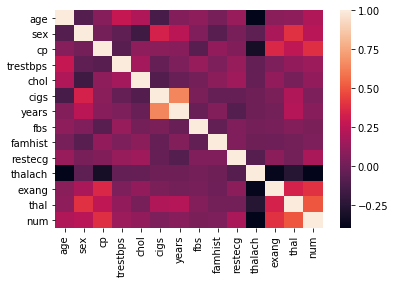

In [4]:
sns.heatmap(df.corr())

In [5]:
cols = df.columns
target_col = 'num'
# useless_col = [target_col, "acceleration", 'model.year', 'origin']
feat_cols = [c for c in cols if c != target_col]
X = df[feat_cols].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scores = []
print(feat_cols)
for k in range(2, 21):
    print(k)
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'famhist', 'restecg', 'thalach', 'exang', 'thal']
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


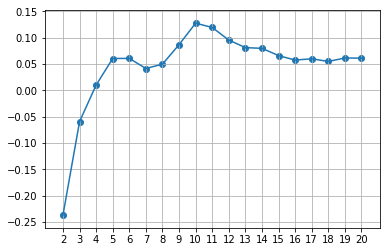

In [7]:
plt.plot(range(2, 21), scores)
plt.scatter(range(2, 21), scores)
plt.grid()
_ =plt.xticks(range(2, 21))

In [8]:
model = KNeighborsRegressor(n_neighbors=13, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test_pca).round()
# print(preds)
diffs = y_test - preds
# print(diffs)
print(model.score(X_test_pca, y_test))
the_score = [0]*len(y_test)
the_score = [1 for x in preds if x == 0]
percent = 1-(sum(the_score)/len(y_test))
print(percent)

0.08105521768457546

In [9]:
pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

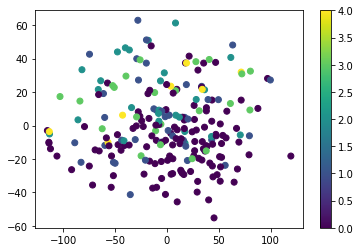

In [10]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

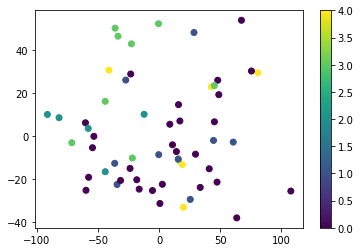

In [11]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

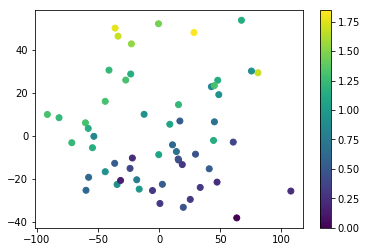

In [12]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

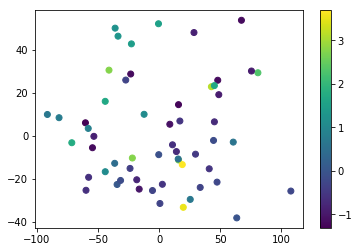

In [13]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=diffs)
_ = plt.colorbar()

In [14]:
import numpy as np

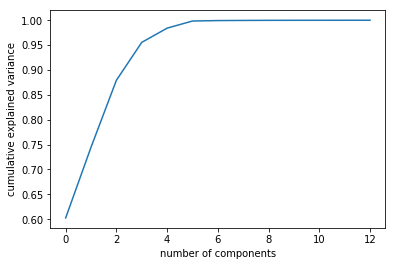

In [15]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Adding Scaling ###

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
scores = []
# print(feat_cols)
for k in range(2, 21):
    print(k)
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


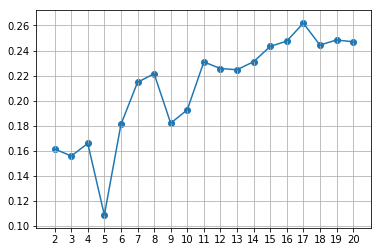

In [20]:
plt.plot(range(2, 21), scores)
plt.scatter(range(2, 21), scores)
plt.grid()
_ =plt.xticks(range(2, 21))

In [21]:
model = KNeighborsRegressor(n_neighbors=17, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test_pca).round()
# print(preds)
diffs = y_test - preds
# print(diffs)
print(model.score(X_test_pca, y_test))
the_score = [0]*len(y_test)
the_score = [1 for x in preds if x == 0]
percent = 1-(sum(the_score)/len(y_test))
print(percent)

0.26185818600459865

In [22]:
pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

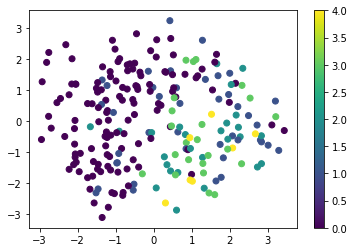

In [23]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

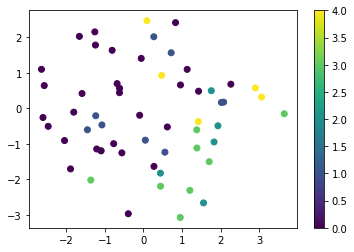

In [24]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

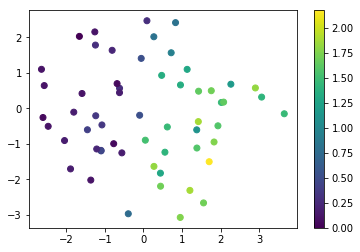

In [25]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

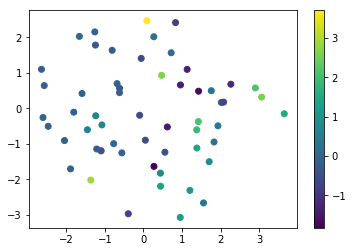

In [26]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=diffs)
_ = plt.colorbar()

### Using PCA for feature selection ###

In [27]:
# Make an instance of the Model
pca = PCA(.95)

In [28]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
X_train_pca = pca.transform(X_train)
X_test_pca= pca.transform(X_test)

In [32]:
scores = []
# print(feat_cols)
for k in range(2, 21):
    print(k)
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train_pca, y_train)
    scores.append(model.score(X_test_pca, y_test))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


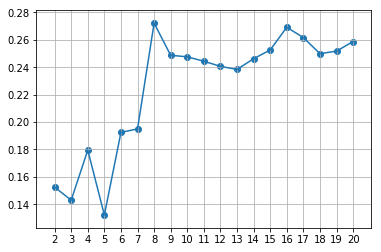

In [33]:
plt.plot(range(2, 21), scores)
plt.scatter(range(2, 21), scores)
plt.grid()
_ =plt.xticks(range(2, 21))

In [41]:
model = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)
model.fit(X_train_pca, y_train)
preds = model.predict(X_test_pca).round()
# print(preds)
diffs = y_test - preds
# print(diffs)
print(model.score(X_test_pca, y_test))
the_score = [0]*len(y_test)
the_score = [1 for x in preds if x == 0]
percent = 1-(sum(the_score)/len(y_test))
print(percent)

0.2721197289156627
0.5614035087719298
